#教育経済学：課題１
##「大学進学率に対する回帰分析」
大学進学率に対して、可処分所得、初年度納付金、３年前中学校卒業者数を説明変数として回帰分析を行う。  
（出典）「家計調査結果」(総務省統計局)、総務省統計局「日本の統計 2015」、文部科学省調査より算出

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
# データを読み込む
df = pd.read_csv("domestic.csv", index_col='year', dtype='float')
df['log_income'] = np.log(df['income'])
df['log_pay'] = np.log(df['pay'])
df['log_pop'] = np.log(df['pop'])

In [4]:
# 要約統計量
df[['enroll' ,'log_income', 'log_pay', 'log_pop']].describe()

,enroll,log_income,log_pay,log_pop
count,47.000000,47.000000,47.000000,47.000000
mean,37.798936,12.864880,13.588054,14.342272
std,11.082234,0.234680,0.341217,0.165470
min,15.660000,12.275375,12.826275,14.008883
25%,34.905000,12.824653,13.230646,14.249943
50%,37.610000,12.949692,13.685634,14.307435
75%,48.390000,13.037063,13.893989,14.448059
max,56.200000,13.089220,13.984339,14.728288


In [5]:
# 相関を求める
df[['log_income', 'log_pay', 'log_pop']].corr()

,log_income,log_pay,log_pop
log_income,1.000000,0.857604,-0.401428
log_pay,0.857604,1.000000,-0.383214
log_pop,-0.401428,-0.383214,1.000000


                            OLS Regression Results                            
Dep. Variable:                 enroll   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           2.20e-16
Time:                        23:39:17   Log-Likelihood:                -143.69
No. Observations:                  47   AIC:                             291.4
Df Residuals:                      45   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -498.6344     42.515    -11.728      0.0

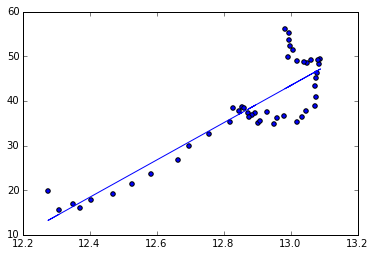

In [6]:
# 単回帰分析（大学進学率と可処分所得）
# 説明変数設定
X = df[['log_income']]
X = sm.add_constant(X)
X.head()
# 被説明変数設定
Y = df['enroll']
Y.head()
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model1 = sm.OLS(Y,X)
results1 = model1.fit()
print(results1.summary())
plt.scatter(df['log_income'], df['enroll'])
plt.plot(df['log_income'], results1.predict())

                            OLS Regression Results                            
Dep. Variable:                 enroll   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     117.0
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           4.18e-14
Time:                        23:39:17   Log-Likelihood:                -149.13
No. Observations:                  47   AIC:                             302.3
Df Residuals:                      45   BIC:                             306.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -337.2651     34.681     -9.725      0.0

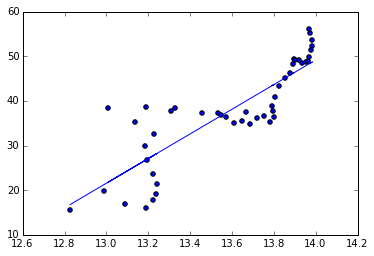

In [7]:
# 単回帰分析（大学進学率と初年度納付金）
# 説明変数設定
X = df[['log_pay']]
X = sm.add_constant(X)
# 被説明変数設定
Y = df['enroll']
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model2 = sm.OLS(Y,X)
results2 = model2.fit()
print(results2.summary())
plt.scatter(df['log_pay'], df['enroll'])
plt.plot(df['log_pay'], results2.predict())

                            OLS Regression Results                            
Dep. Variable:                 enroll   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     47.68
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           1.41e-08
Time:                        23:39:17   Log-Likelihood:                -162.26
No. Observations:                  47   AIC:                             328.5
Df Residuals:                      45   BIC:                             332.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1875.1078    266.083      7.047      0.0

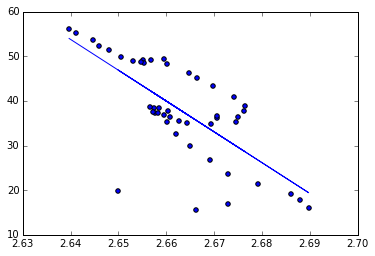

In [8]:
# 単回帰分析（大学進学率と初年度納付金）
# 説明変数設定
X = np.log(df[['log_pop']])
X = sm.add_constant(X)
# 被説明変数設定
Y = df['enroll']
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model3 = sm.OLS(Y,X)
results3 = model3.fit()
print(results3.summary())
plt.scatter(np.log(df['log_pop']), df['enroll'])
plt.plot(np.log(df['log_pop']), results3.predict())

In [9]:
# 説明変数設定
X = df[['log_income', 'log_pay', 'log_pop']]
X = sm.add_constant(X)
X.head()
# 被説明変数設定
Y = df['enroll']
Y.head()
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model4 = sm.OLS(Y,X)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                 enroll   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     330.6
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           1.04e-29
Time:                        23:39:18   Log-Likelihood:                -104.49
No. Observations:                  47   AIC:                             217.0
Df Residuals:                      43   BIC:                             224.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         29.1362     45.057      0.647      0.5

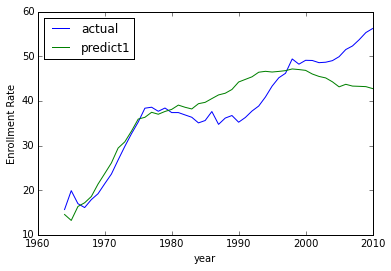

In [10]:
plt.plot(np.asarray(df.index).astype(int), df['enroll'], label='actual')
plt.plot(np.asarray(df.index).astype(int), results1.predict(), label='predict1')
plt.xlabel('year')
plt.ylabel('Enrollment Rate')
plt.legend(loc=2)
plt.savefig('predict1.png')

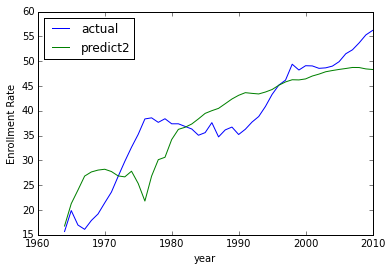

In [11]:
plt.plot(np.asarray(df.index).astype(int), df['enroll'], label='actual')
plt.plot(np.asarray(df.index).astype(int), results2.predict(), label='predict2')
plt.xlabel('year')
plt.ylabel('Enrollment Rate')
plt.legend(loc=2)
plt.savefig('predict2.png')

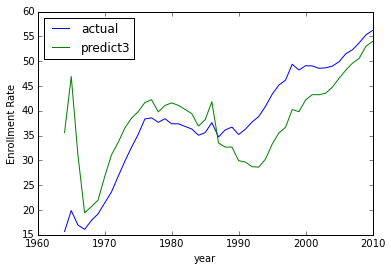

In [12]:
plt.plot(np.asarray(df.index).astype(int), df['enroll'], label='actual')
plt.plot(np.asarray(df.index).astype(int), results3.predict(), label='predict3')
plt.xlabel('year')
plt.ylabel('Enrollment Rate')
plt.legend(loc=2)
plt.savefig('predict3.png')

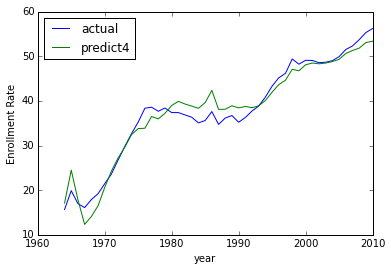

In [13]:
plt.plot(np.asarray(df.index).astype(int), df['enroll'], label='actual')
plt.plot(np.asarray(df.index).astype(int), results4.predict(), label='predict4')
plt.xlabel('year')
plt.ylabel('Enrollment Rate')
plt.legend(loc=2)
plt.savefig('predict4.png')